In [1]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_sim
from pathos.multiprocessing import Pool
from typing import List, Tuple, Dict, Iterable, Optional, DefaultDict

### Use piecewise to recreate the original sequence

In [2]:
sequence = RSC_sim.load_sequence('sequences/original.txt')

In [3]:
ground_state_counts = []
ground_errs = []
nums_survive = []
num_errs = []
n_bars = []
n_errs = []

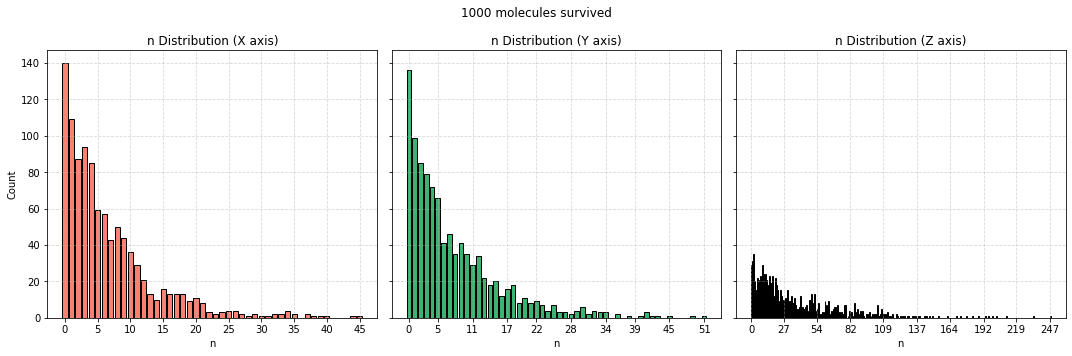

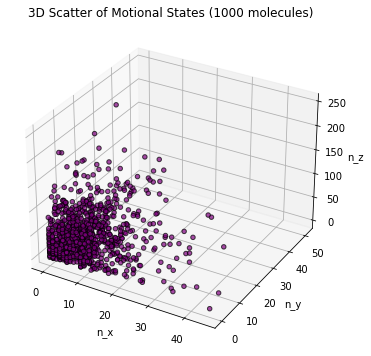

In [4]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

In [5]:
n_bar, num_survive, ground_state_count, n_err, num_err, ground_err = RSC_sim.apply_raman_sequence(mol_list, sequence, record_all=True)
ground_state_counts.append(ground_state_count)
ground_errs.append(ground_err)
nums_survive.append(num_survive)
num_errs.append(num_err)
n_bars.append(n_bar)
n_errs.append(n_err)

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:44<00:00, 22.72it/s]


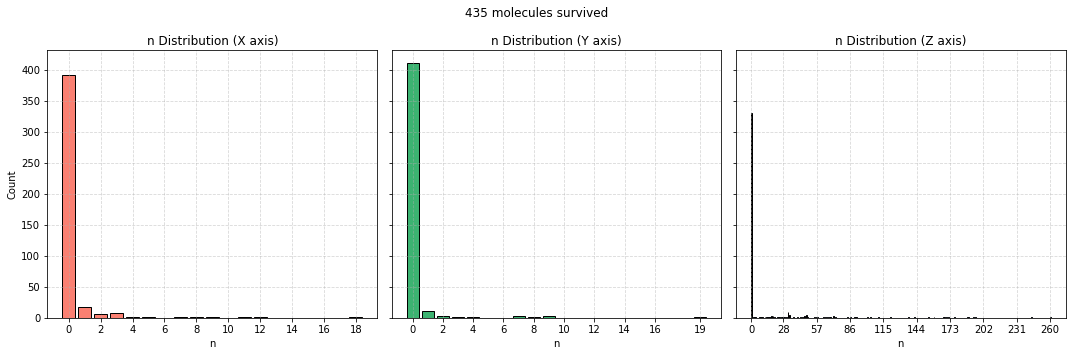

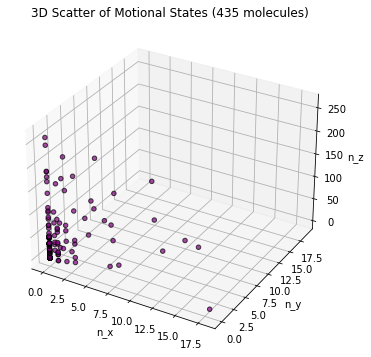

In [6]:
_, _, _ = RSC_sim.get_n_distribution(mol_list)

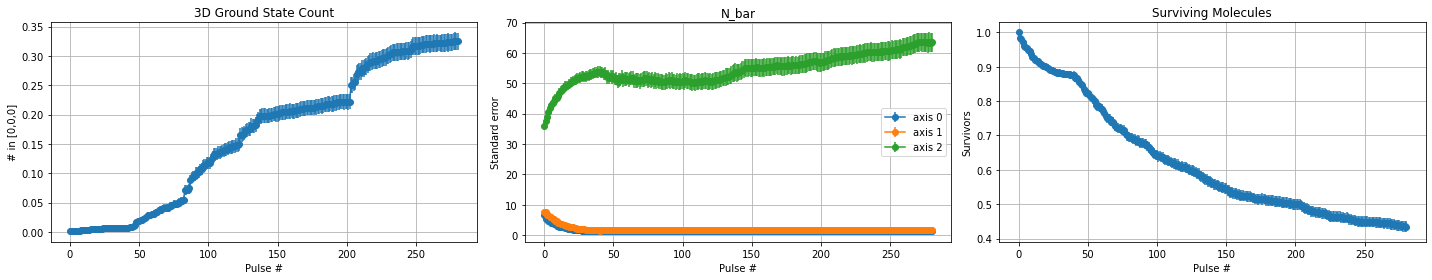

In [7]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, n_err, num_err, ground_err)

### Optimize with Genetic Algorithm

In [8]:
sequence = RSC_sim.load_sequence('sequences/2025-10-12_22-35-53/best_sequence.txt')

In [9]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)

In [10]:
n_bar, num_survive, ground_state_count, n_err, num_err, ground_err = RSC_sim.apply_raman_sequence(mol_list, sequence, record_all=True)
ground_state_counts.append(ground_state_count)
ground_errs.append(ground_err)
nums_survive.append(num_survive)
num_errs.append(num_err)
n_bars.append(n_bar)
n_errs.append(n_err)

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:52<00:00, 18.92it/s]


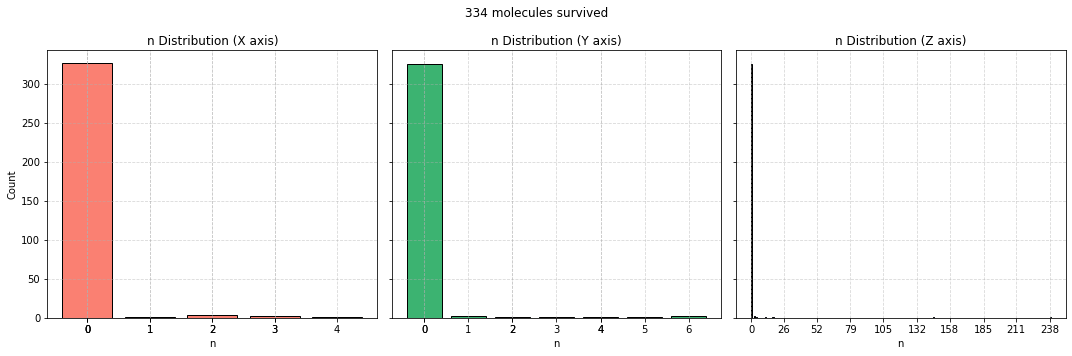

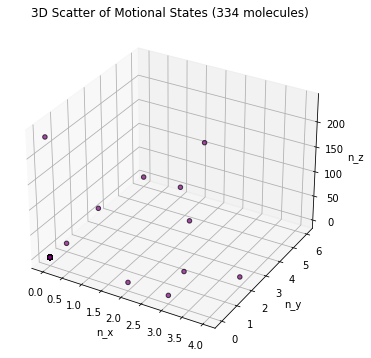

In [11]:
_, _, _ = RSC_sim.get_n_distribution(mol_list)

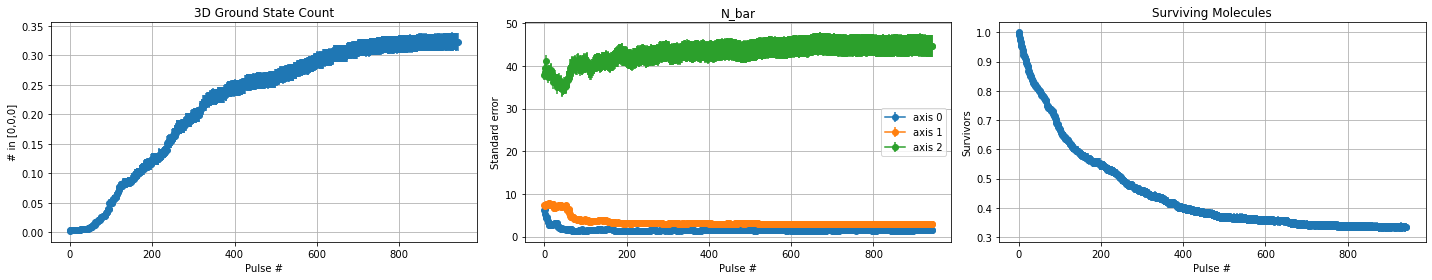

In [12]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, n_err, num_err, ground_err)

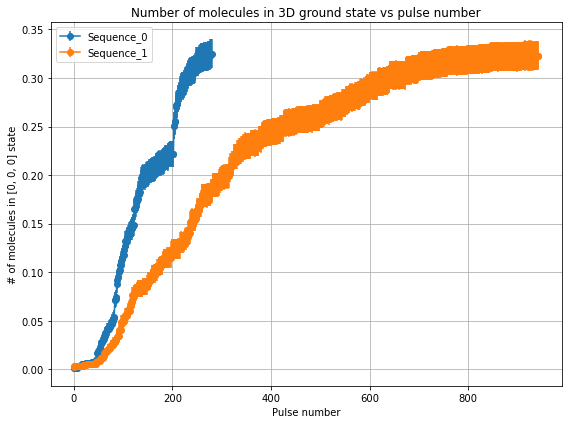

In [13]:
plt.figure(figsize=(8, 6))
for i, count in enumerate(ground_state_counts):
    plt.errorbar(range(len(count)), count, ground_errs[i], marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [14]:
def cost_function(mol_list: Iterable) -> int:
    good = 0
    for mol in mol_list:
        if mol.n[0] == 0 and mol.n[1] == 0 and mol.n[2] == 0 and mol.state == 1 and mol.spin == 0 and not mol.islost:
            good += 1
    return good

In [15]:
cost_function(mol_list)

323